# 1 - Perkenalan

Nama : Nurul Izzah

Batch : 018

Dataset : churn

Objective : untuk memprediksi customer yang akan berhenti dengan tujuan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang di tawarkan

# 2 - Import Libraries

In [ ]:
# import library yg digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
!pip install feature-engine

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import make_pipeline
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input, concatenate
from tensorflow import keras




import pickle
import json

import warnings
warnings.filterwarnings(action='ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 KB 7.7 MB/s eta 0:00:00


# 3 - Data Loading

In [ ]:
# URL dari dataset
url = 'https://raw.githubusercontent.com/H8-Assignments-Bay/p2---ftds-018-rmt---m1-nrzzh99/main/churn.csv?token=GHSAT0AAAAAAB56EUP3FR6BEGIWUXTQEPKIZBFXSOA'

In [ ]:
# Menyimpan file ke dalam cache TensorFlow
path = tf.keras.utils.get_file('churn.csv', url)

6784747/6784747 [==============================] - 0s 0us/step


In [ ]:
# Data Loading
df = pd.read_csv(path)
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [ ]:
#menduplikat data agar tidak kehilangan data asli
df_copy = df.copy()

In [ ]:
#melihat 10 data teratas
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [ ]:
#melihat 10 data bawah
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [ ]:
#melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

- terdapat 37010 baris dan 22 kolom
- Terdapat beberapa kolom yang memiliki missing values, seperti gender, region_category, joined_through_referral, preferred_offer_types, dan medium_of_operation
- data terdiri dari kolom dengan tipe data float64(4), int64(3), dan object(15)

In [ ]:
df['feedback'].unique()

array(['Poor Website', 'Poor Customer Service', 'Too many ads',
       'Poor Product Quality', 'No reason specified',
       'Products always in Stock', 'Reasonable Price',
       'Quality Customer Care', 'User Friendly Website'], dtype=object)

In [ ]:
#deskripstif analisis
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Berdasarkan statistik deskriptif pada kolom numerik, dapat disimpulkan bahwa:

- Rata-rata usia customer adalah 37 tahun, dengan rentang usia antara 10 hingga 64 tahun.

- Rata-rata lama hari sejak login terakhir adalah -41 hari, yang bisa di indikasikan data yang hilang atau error dalam pengambilan data

- Rata-rata waktu yang dihabiskan di platform adalah sekitar 279 detik (4,65 menit)

- Rata-rata nilai transaksi yang dilakukan customer adalah sekitar 29.272,43

- Rata-rata frekuensi login dalam sehari adalah sekitar 14,65 kali

- Rata-rata jumlah poin di dalam wallet customer adalah sekitar 623,59

- Mayoritas customer (54,09%) termasuk ke dalam kategori churn risk score 1, yang berarti tidak cenderung berhenti menggunakan produk

# 4 - Exploratory Data Analysis (EDA)

> Melihat distribusi churn risk score

In [ ]:
# Set ukuran visualisasi
sns.set(rc={'figure.figsize':(12,8)})

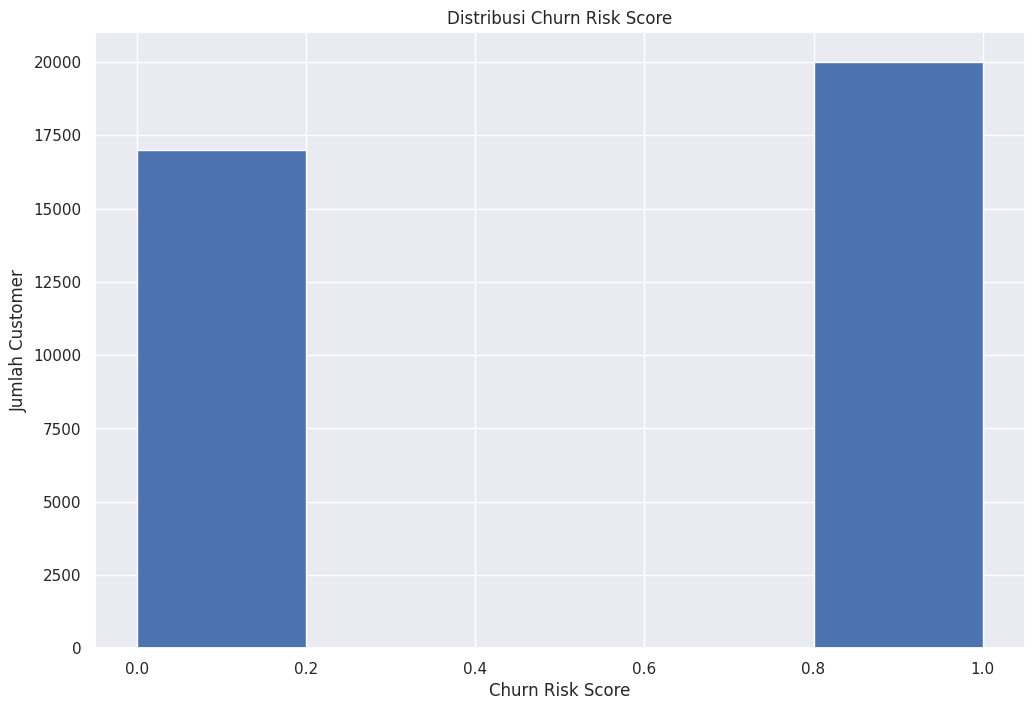

In [ ]:
# Plot distribusi churn risk score
plt.figure(figsize=(12,8))
plt.hist(df['churn_risk_score'], bins=5)
plt.title('Distribusi Churn Risk Score')
plt.xlabel('Churn Risk Score')
plt.ylabel('Jumlah Customer')
plt.show()

berdasarkan visualisasi diatas, mayoritas customer memiliki risiko churn yang rendah, namun masih ada sejumlah customer yang memiliki risiko churn yang tinggi

> Melihat hubungan antara kolom

<Axes: >

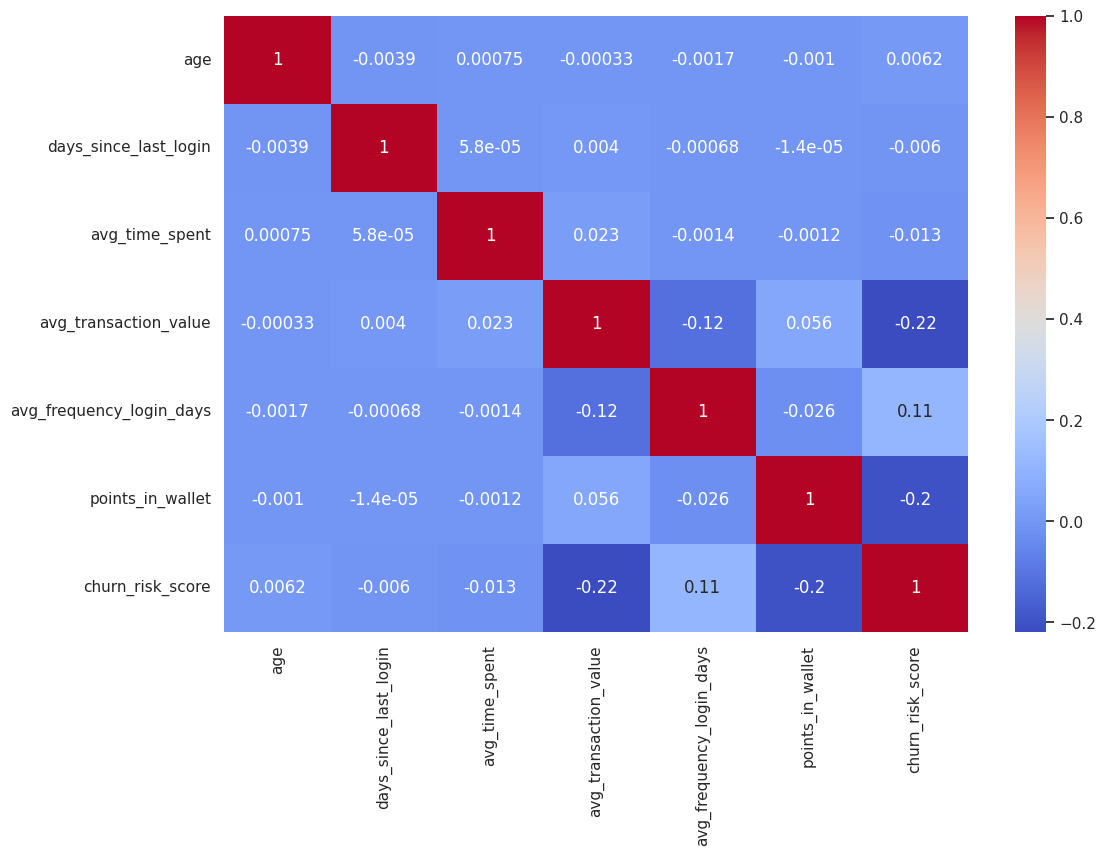

In [ ]:
# Mengecek korelasi antar kolom
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Berdasarkan heatmap, korelasi positif tertinggi adalah antara churn risk score dengan variabel age dan avg_frequency_login_days, sedangkan korelasi negatif tertinggi adalah dengan variabel avg_transaction_value dan points_in_wallet.

> Melihat hubungan antara usia dengan churn risk score

<Axes: xlabel='age', ylabel='churn_risk_score'>

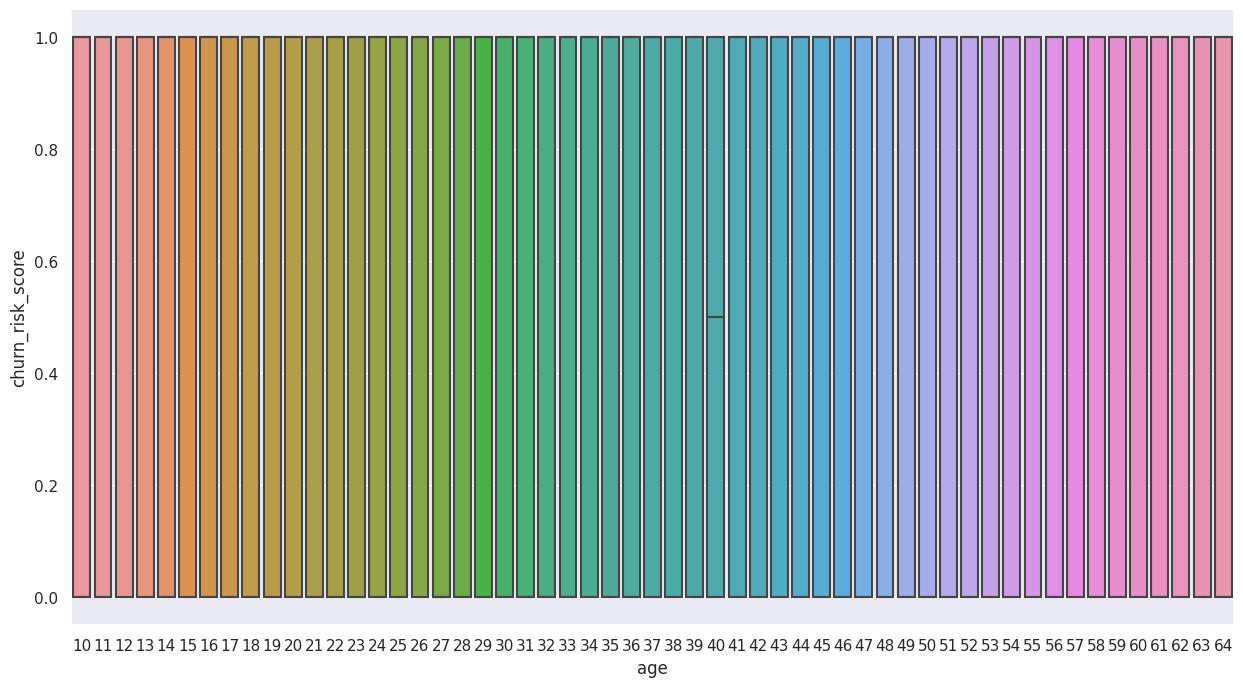

In [ ]:
# membuat box plot churn risk score berdasarkan usia
plt.figure(figsize=(15,8))
sns.boxplot(x='age', y='churn_risk_score', data=df)

berdasarkan visualisasi usia, dapat dilihat bahwa untuk semua data usia dari 10 sampai 64 memiliki nilai churn risk score di 1.0. Hal ini menunjukkan bahwa pada rentang usia tersebut, terdapat pola yang sama yaitu pelanggan cenderung memiliki churn risk score di angka 1.0.

> Melihat apakah ada perbedaan perilaku antara laki-laki dan perempuan dalam menggunakan produk

In [ ]:
# membuat groupping
df_gender = df[['gender', 'churn_risk_score']]

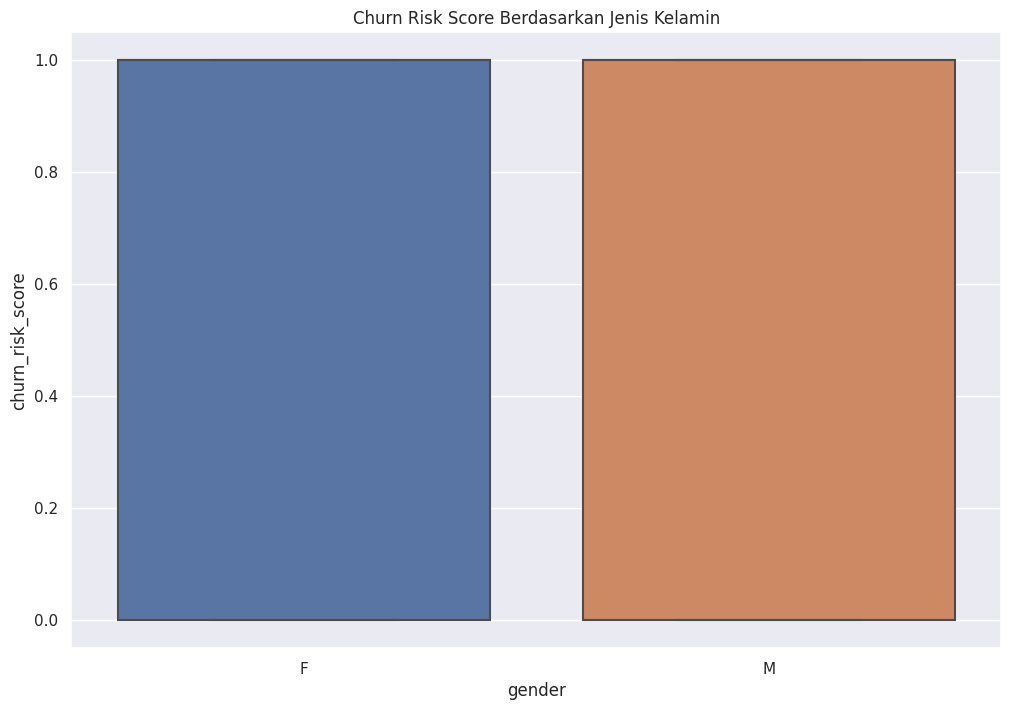

In [ ]:
# membuat boxplot churn risk score berdasarkan jenis kelamin
plt.figure(figsize=(12,8))
sns.boxplot(x='gender', y='churn_risk_score', data=df_gender)
plt.title('Churn Risk Score Berdasarkan Jenis Kelamin')
plt.show()

berdasarkan visualisasi, kolom gender memiliki nilai churn risk score di angka 1.0 pada box plot. Hal ini menunjukkan bahwa baik pelanggan laki-laki maupun perempuan cenderung memiliki churn risk score yang sama yaitu di angka 1.0.

> melihat apakah ada perbedaan perilaku antara customer di berbagai kategori wilayah

<Axes: xlabel='region_category', ylabel='churn_risk_score'>

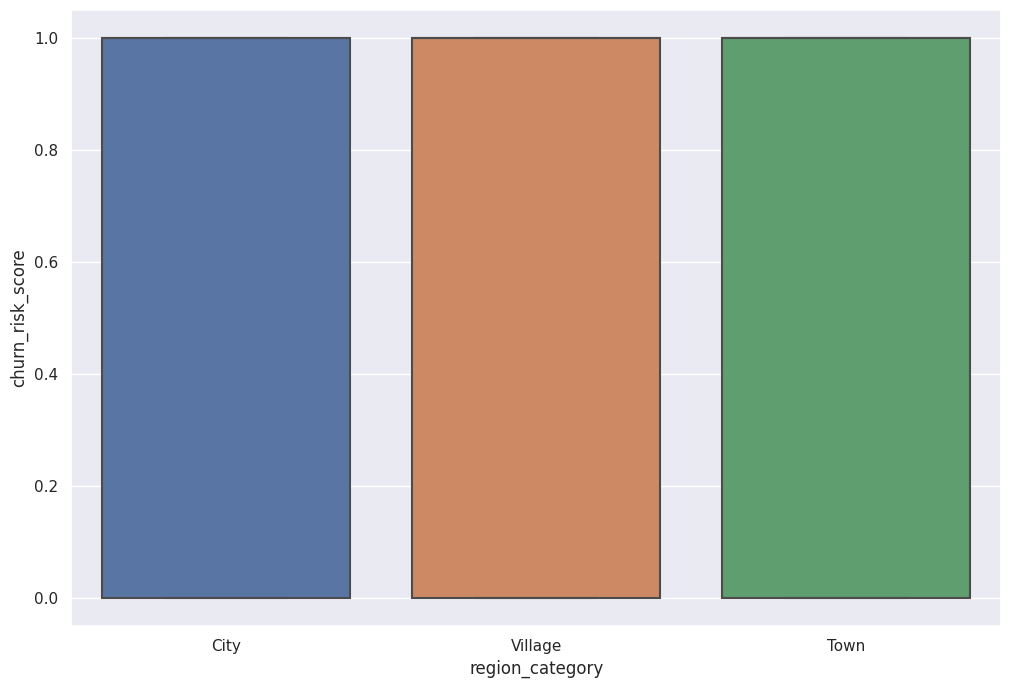

In [ ]:
# visualisasi distribusi churn risk score berdasarkan kategori wilayah
plt.figure(figsize=(12,8))
sns.boxplot(x='region_category', y='churn_risk_score', data=df)

visualisasi tersebut menunjukan kategori wilayah memiliki nilai churn risk score di angka 1.0. Hal ini menunjukkan bahwa pada semua kategori wilayah, terdapat pola yang sama yaitu pelanggan cenderung memiliki churn risk score di angka 1.0. 

> melihat apakah customer yang jarang login lebih cenderung berhenti menggunakan produk daripada yang sering login

<Axes: xlabel='churn_risk_score', ylabel='avg_frequency_login_days'>

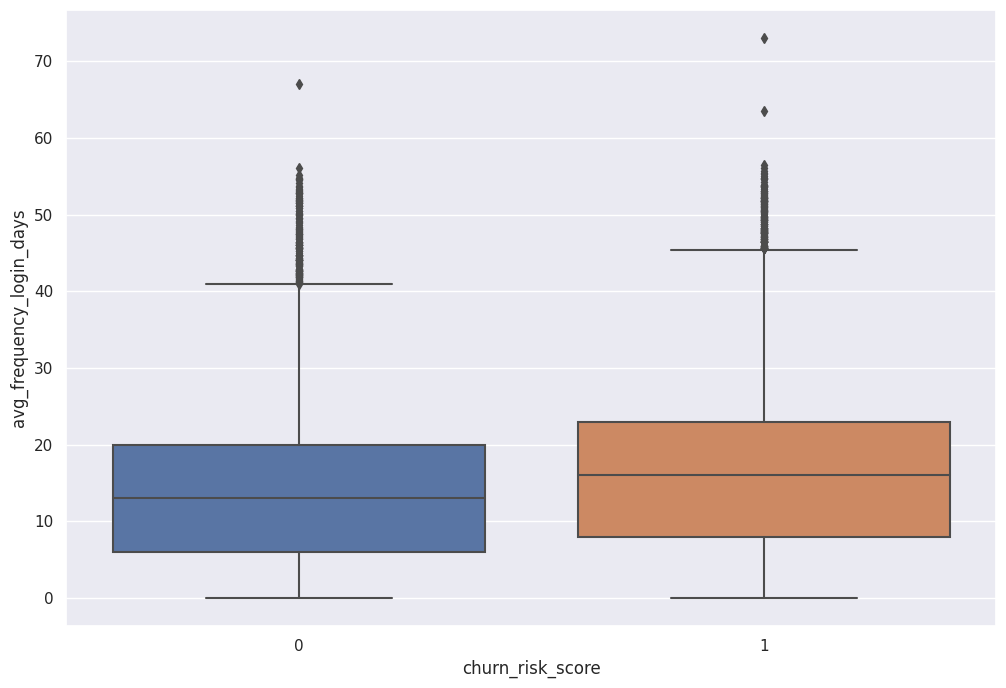

In [ ]:
# Visualize relationship between churn risk score and frequency of login
plt.figure(figsize=(12,8))
sns.boxplot(x="churn_risk_score", y="avg_frequency_login_days", data=df)

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa tidak terdapat perbedaan signifikan dalam frekuensi login antara churn risk score class 0 dan class 1. Namun, churn risk score class 0 memiliki banyak outlier, yang berarti ada beberapa pelanggan yang memiliki frekuensi login yang sangat rendah atau sangat tinggi

> melihat apakah customer yang pernah mengajukan keluhan lebih cenderung berhenti menggunakan produk daripada yang tidak pernah mengajukan keluhan

In [ ]:
# Menghitung jumlah customer yang mengajukan keluhan di masa lalu dan yang tidak
complaint_count = df['past_complaint'].value_counts()

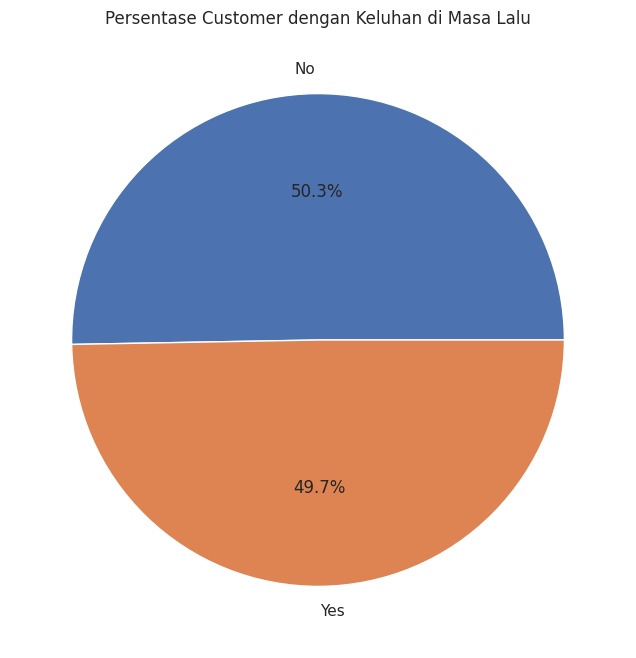

In [ ]:
# Membuat pie chart untuk menunjukkan persentase customer yang mengajukan keluhan
plt.figure(figsize=(12,8))
plt.pie(complaint_count, labels=complaint_count.index, autopct='%1.1f%%')
plt.title('Persentase Customer dengan Keluhan di Masa Lalu')
plt.show()

dari visualisasi dapat disimpulkan bahwa hampir setengah (49.7%) dari total customer pernah mengajukan keluhan di masa lalu, sedangkan sisanya sebanyak 50.3% tidak pernah mengajukan keluhan.

## 4.1 - Data Cleaning

In [ ]:
#melihat semua tipe data dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [ ]:
#mengganti tipe data last_visit_time dari object ke datetime
df['last_visit_time'] = df['last_visit_time'].astype('datetime64')

In [ ]:
# mengganti tipe data dari kolom joining_date menjadi datetime
df['joining_date'] = pd.to_datetime(df['joining_date'])

In [ ]:
#melihat duplikasi data
df.duplicated().sum()

18

terlihat bahwa terdapat 18 data yg duplikasi, maka akan di drop

In [ ]:
# drop duplicated
df = df.drop_duplicates()

karena tidak berpengaruh dalam memprediksi, kolom user_id di drop

In [ ]:
#menghapus kolom user_id
df.drop('user_id', axis=1, inplace=True)

## 4.2 - Check Cardinality

In [ ]:
# Let's inspect the cardinality, this is the number of different labels, for the different categorical variables

print('Number of categories in the variable gender   : {}'.format(len(df.gender.unique())))
print('Number of categories in the variable region_category   : {}'.format(len(df.region_category.unique())))
print('Number of categories in the variable joined_through_referral    : {}'.format(len(df.joined_through_referral.unique())))
print('Number of categories in the variable preferred_offer_types : {}'.format(len(df.preferred_offer_types.unique())))
print('Number of categories in the variable medium_of_operation   : {}'.format(len(df.medium_of_operation.unique())))
print('Number of categories in the variable internet_option    : {}'.format(len(df.internet_option.unique())))
print('Number of categories in the variable used_special_discount : {}'.format(len(df.used_special_discount.unique())))
print('Number of categories in the variable offer_application_preference : {}'.format(len(df.offer_application_preference.unique())))
print('Number of categories in the variable past_complaint : {}'.format(len(df.past_complaint.unique())))
print('Number of categories in the variable complaint_status : {}'.format(len(df.complaint_status.unique())))
print('Number of categories in the variable feedback : {}'.format(len(df.feedback.unique())))
print('Total Dataset value   : {}'.format(len(df)))

Number of categories in the variable gender   : 3
Number of categories in the variable region_category   : 4
Number of categories in the variable joined_through_referral    : 3
Number of categories in the variable preferred_offer_types : 4
Number of categories in the variable medium_of_operation   : 4
Number of categories in the variable internet_option    : 3
Number of categories in the variable used_special_discount : 2
Number of categories in the variable offer_application_preference : 2
Number of categories in the variable past_complaint : 2
Number of categories in the variable complaint_status : 5
Number of categories in the variable feedback : 9
Total Dataset value   : 36992


In [ ]:
#melihat nilai unik di kolom gender
df.gender.unique()

array(['F', 'M', nan], dtype=object)

terdapat missing value di kolom gender mengakibatkan memiliki 3 kategori data

In [ ]:
#melihat cardinality di kolom gender
cardinality = df['gender'].value_counts().reset_index()
cardinality.columns = ['gender', 'count']
cardinality

,gender,count
0,F,18490
1,M,18443


In [ ]:
# melihat missing value di kolom gender
df['gender'].isnull().sum()

59

jumlah missing value di kolom gender adalah 59

In [ ]:
#melihat nilai unik di kolom region_category
df.region_category.unique()

array([nan, 'City', 'Village', 'Town'], dtype=object)

terdapat missing value di kolom region_catgory mengakibatkan memiliki 4 kategori data

In [ ]:
#melihat cardinality di kolom region_category
cardinality = df['region_category'].value_counts().reset_index()
cardinality.columns = ['region_category', 'count']
cardinality

,region_category,count
0,Town,14128
1,City,12737
2,Village,4699


In [ ]:
# melihat missing value di kolom gender
df['region_category'].isnull().sum()

5428

In [ ]:
#melihat nilai unik di kolom joined_through_referral
df.joined_through_referral.unique()

array(['Yes', nan, 'No'], dtype=object)

terdapat missing value di kolom join_through_referral mengakibatkan memiliki 3 kategori data

In [ ]:
#melihat cardinality di kolom joined_through_referral
cardinality = df['joined_through_referral'].value_counts().reset_index()
cardinality.columns = ['joined_through_referral', 'count']
cardinality

,joined_through_referral,count
0,No,15839
1,Yes,15715


In [ ]:
# melihat missing value di kolom joined_through_referral
df['joined_through_referral'].isnull().sum()

5438

terdapat sebanyak 5438 missing value di kolom joined_through_referral

In [ ]:
#melihat nilai unik di kolom preferred_offer_types
df.preferred_offer_types.unique()

array(['Without Offers', 'Credit/Debit Card Offers',
       'Gift Vouchers/Coupons', nan], dtype=object)

terdapat missing value di kolom preferred_offer_types mengakibatkan memiliki 4 kategori data

In [ ]:
#melihat cardinality di kolom preferred_offer_types
cardinality = df['preferred_offer_types'].value_counts().reset_index()
cardinality.columns = ['preferred_offer_types', 'count']
cardinality

,preferred_offer_types,count
0,Gift Vouchers/Coupons,12349
1,Credit/Debit Card Offers,12274
2,Without Offers,12081


In [ ]:
# melihat missing value di kolom preferred_offer_types
df['preferred_offer_types'].isnull().sum()

288

tedapat sebanyak 288 missing value di kolom preferred_offer_types

In [ ]:
#melihat nilai unik di kolom medium_of_operation
df.medium_of_operation.unique()

array([nan, 'Desktop', 'Smartphone', 'Both'], dtype=object)

terdapat missing value di kolom medium_of_operation mengakibatkan memiliki 4 kategori data

In [ ]:
#melihat cardinality di kolom medium_of_operation
cardinality = df['medium_of_operation'].value_counts().reset_index()
cardinality.columns = ['medium_of_operation', 'count']
cardinality

,medium_of_operation,count
0,Desktop,13913
1,Smartphone,13876
2,Both,3810


In [ ]:
# melihat missing value di kolom medium_of_operation
df['medium_of_operation'].isnull().sum()

5393

terdapat sebanyak 5393 missing value di kolom medium_of_operation

In [ ]:
#melihat nilai unik di kolom internet_option
df.internet_option.unique()

array(['Wi-Fi', 'Fiber_Optic', 'Mobile_Data'], dtype=object)

In [ ]:
#melihat cardinality di kolom internet_option
cardinality = df['internet_option'].value_counts().reset_index()
cardinality.columns = ['internet_option', 'count']
cardinality

,internet_option,count
0,Wi-Fi,12413
1,Mobile_Data,12343
2,Fiber_Optic,12236


In [ ]:
#melihat nilai unik di kolom used_special_discount
df.used_special_discount.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#melihat cardinality di kolom used_special_discount
cardinality = df['used_special_discount'].value_counts().reset_index()
cardinality.columns = ['used_special_discount', 'count']
cardinality

,used_special_discount,count
0,Yes,20342
1,No,16650


In [ ]:
#melihat nilai unik di kolom offer_application_preference
df.offer_application_preference.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#melihat cardinality di kolom offer_application_preference
cardinality = df['offer_application_preference'].value_counts().reset_index()
cardinality.columns = ['offer_application_preference', 'count']
cardinality

,offer_application_preference,count
0,Yes,20440
1,No,16552


In [ ]:
#melihat nilai unik di kolom past_complaint
df.past_complaint.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#melihat cardinality di kolom past_complaint
cardinality = df['past_complaint'].value_counts().reset_index()
cardinality.columns = ['past_complaint', 'count']
cardinality

,past_complaint,count
0,No,18602
1,Yes,18390


In [ ]:
#melihat nilai unik di kolom complaint_status
df.complaint_status.unique()

array(['No Information Available', 'Not Applicable', 'Unsolved', 'Solved',
       'Solved in Follow-up'], dtype=object)

In [ ]:
#melihat cardinality di kolom complaint_status
cardinality = df['complaint_status'].value_counts().reset_index()
cardinality.columns = ['complaint_status', 'count']
cardinality

,complaint_status,count
0,Not Applicable,18602
1,Unsolved,4644
2,Solved,4619
3,Solved in Follow-up,4577
4,No Information Available,4550


In [ ]:
#melihat nilai unik di kolom feedback
df.feedback.unique()

array(['Poor Website', 'Poor Customer Service', 'Too many ads',
       'Poor Product Quality', 'No reason specified',
       'Products always in Stock', 'Reasonable Price',
       'Quality Customer Care', 'User Friendly Website'], dtype=object)

In [ ]:
#melihat cardinality di kolom feedback
cardinality = df['feedback'].value_counts().reset_index()
cardinality.columns = ['feedback', 'count']
cardinality

,feedback,count
0,Poor Product Quality,6350
1,No reason specified,6290
2,Too many ads,6279
3,Poor Website,6271
4,Poor Customer Service,6252
5,Reasonable Price,1417
6,User Friendly Website,1391
7,Products always in Stock,1382
8,Quality Customer Care,1360


# 5 - Feature engineering

## 5.1 - Split between X (Features), y (Target)

In [ ]:
#show data
df

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,2023-03-30 22:29:49,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,2023-03-30 15:44:56,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,2023-03-30 20:31:53,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,2023-03-30 14:28:05,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,2023-03-30 04:16:48,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,2023-03-30 09:32:50,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,2023-03-30 02:28:52,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,2023-03-30 17:50:38,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,2023-03-30 17:07:57,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [ ]:
# Memisahkan data input dan data target
X = df.drop(["churn_risk_score"], axis=1) 
y = df["churn_risk_score"]
X

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,2023-03-30 22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website
1,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,2023-03-30 15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service
2,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,2023-03-30 20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads
3,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,2023-03-30 14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads
4,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,2023-03-30 04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,2023-03-30 09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website
37006,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,2023-03-30 02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price
37007,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,2023-03-30 17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service
37008,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,2023-03-30 17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website


In [ ]:
#Split between Train-set, val-set, test-set

X_train_val, X_test, y_train_val, y_test, = train_test_split(X, y, test_size =0.15, random_state=15)
X_train, X_val, y_train, y_val, = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=15)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26726, 20)
Val Size :  (4717, 20)
Test Size :  (5549, 20)


## 5.2 - Handling Outlier

In [ ]:
# melihat tipe data dari X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26726 entries, 35201 to 10585
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           26726 non-null  int64         
 1   gender                        26681 non-null  object        
 2   region_category               22882 non-null  object        
 3   membership_category           26726 non-null  object        
 4   joining_date                  26726 non-null  datetime64[ns]
 5   joined_through_referral       22816 non-null  object        
 6   preferred_offer_types         26519 non-null  object        
 7   medium_of_operation           22821 non-null  object        
 8   internet_option               26726 non-null  object        
 9   last_visit_time               26726 non-null  datetime64[ns]
 10  days_since_last_login         26726 non-null  int64         
 11  avg_time_spent          

In [ ]:
def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

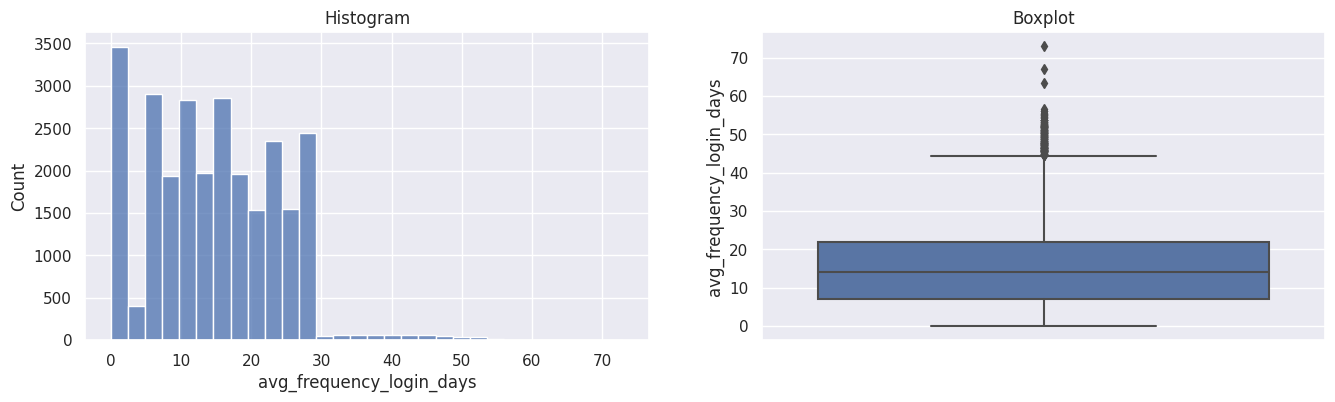


Skewness Value :  0.378782445394615


In [ ]:
#melihat distribusi data dan outlier kolom avg_frequency_login_days
diagnostic_plots(X_train, 'avg_frequency_login_days')
print('\nSkewness Value : ', X_train['avg_frequency_login_days'].skew())

dari visualisasi tersebut, data terdistribusi cenderung ke kiri dan memiliki outlier, tetapi masih bisa dikategorikan distribusi normal

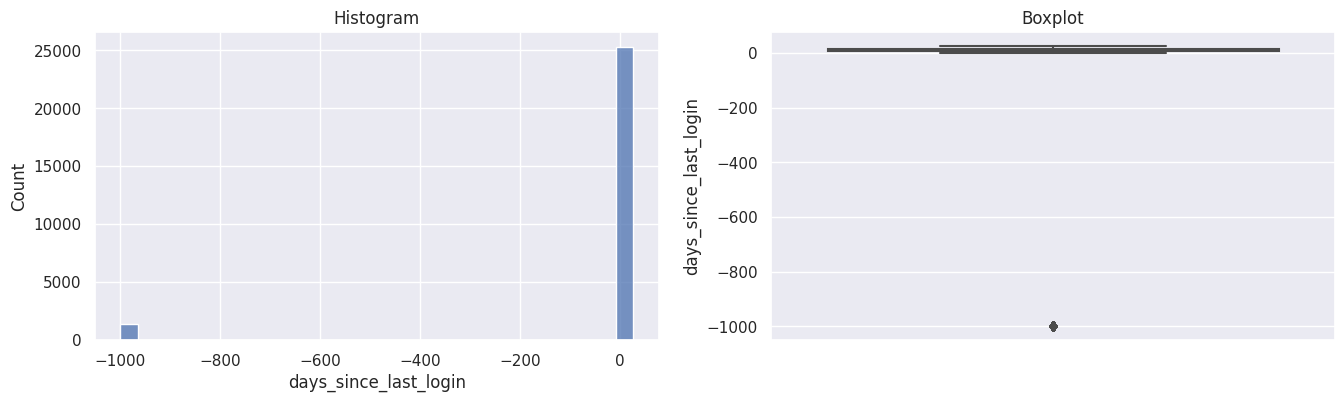


Skewness Value :  -3.9876564157123635


In [ ]:
#melihat distribusi data dan outlier kolom days_since_last_login
diagnostic_plots(X_train, 'days_since_last_login')
print('\nSkewness Value : ', X_train['days_since_last_login'].skew())

pada datanya, terlihat berada di rentang 0 hingga -1000 maka ingin melihat valuenya

In [ ]:
#melihat unique value
X_train['days_since_last_login'].unique()

array([   5,    9,   14,   16,    4,    6,   13,    1,   18,   10,   11,
          7,   15,    8,    2,   17,    3, -999,   22,   21,   23,   20,
         19,   24,   12,   25,   26])

terlihat bahwa, ternyata dapat diidentifikasi nilai -999 sebagai outlier karena nilainya jauh dari nilai lainnya, maka akan digunakan median untuk mengganti nilai outliernya

In [ ]:
# menghitung nilai median dari data tanpa outlier
median = np.median(X_train['days_since_last_login'][X_train['days_since_last_login'] != -999])

In [ ]:
# mengganti nilai outlier dengan median
X_train['days_since_last_login'][X_train['days_since_last_login'] == -999] = median

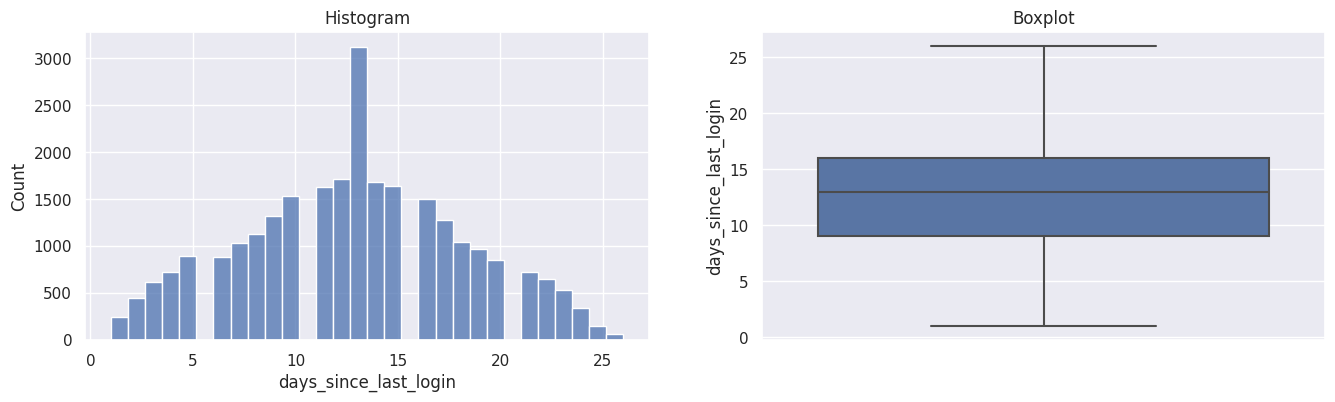


Skewness Value :  0.016681046920384537


In [ ]:
#melihat distribusi data dan outlier kolom days_since_last_login setelah diganti dengan median
diagnostic_plots(X_train, 'days_since_last_login')
print('\nSkewness Value : ', X_train['days_since_last_login'].skew())

setelah diganti, terlihat bahwa datanya sudah tidak memiliki outlier dan terdistribusi normal

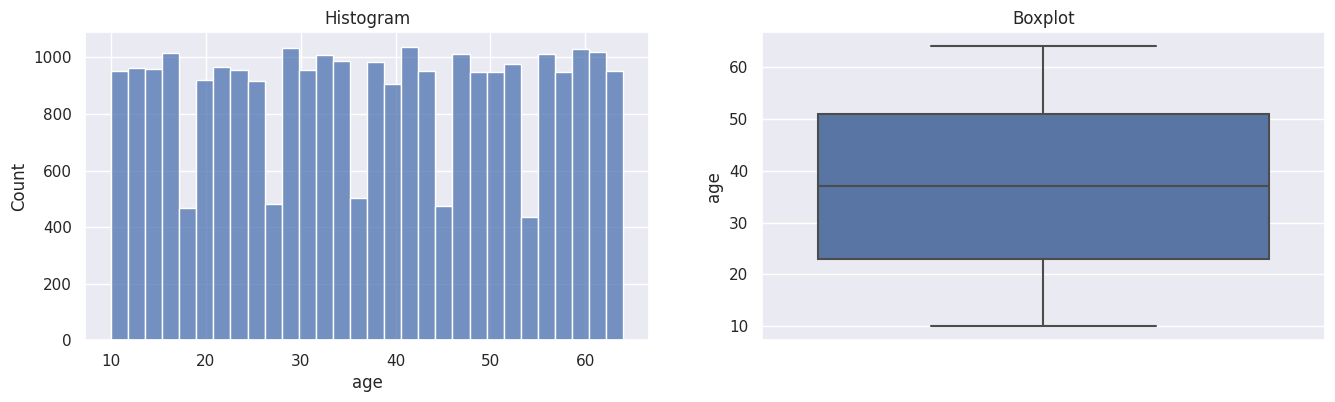


Skewness Value :  -0.006681597556464437


In [ ]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

dari visualisasinya terlihat datanya teredistribusi normal dan tidak memiliki outlier

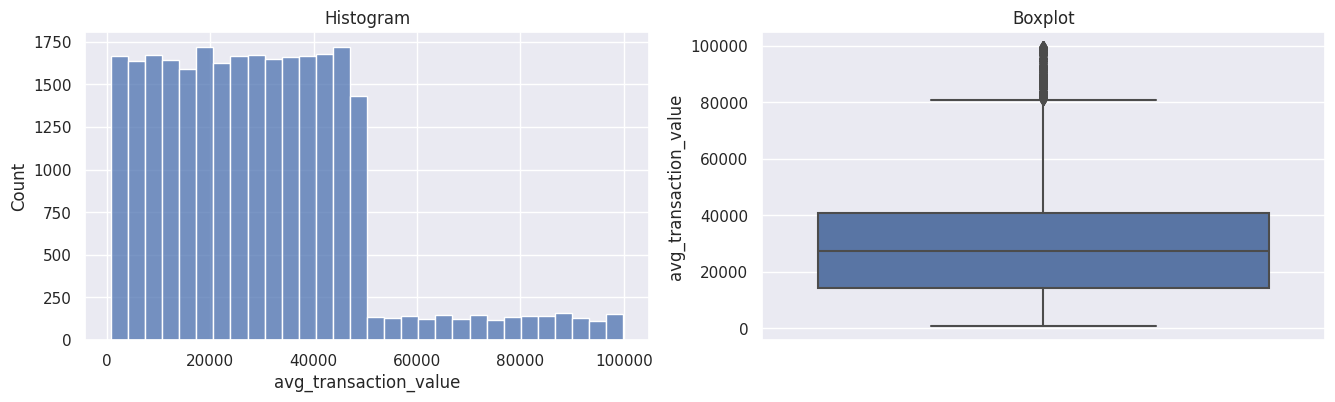


Skewness Value :  1.010638482006976


In [ ]:
#melihat distribusi data dan outlier kolom avg_transaction_value
diagnostic_plots(X_train, 'avg_transaction_value')
print('\nSkewness Value : ', X_train['avg_transaction_value'].skew())

dari visualisasinya data cenderung kearah kiri dan bisa dikategorikan datanya terdistribusi skew karena memiliki skewness value melebihi 0.6 dan memiliki outlier

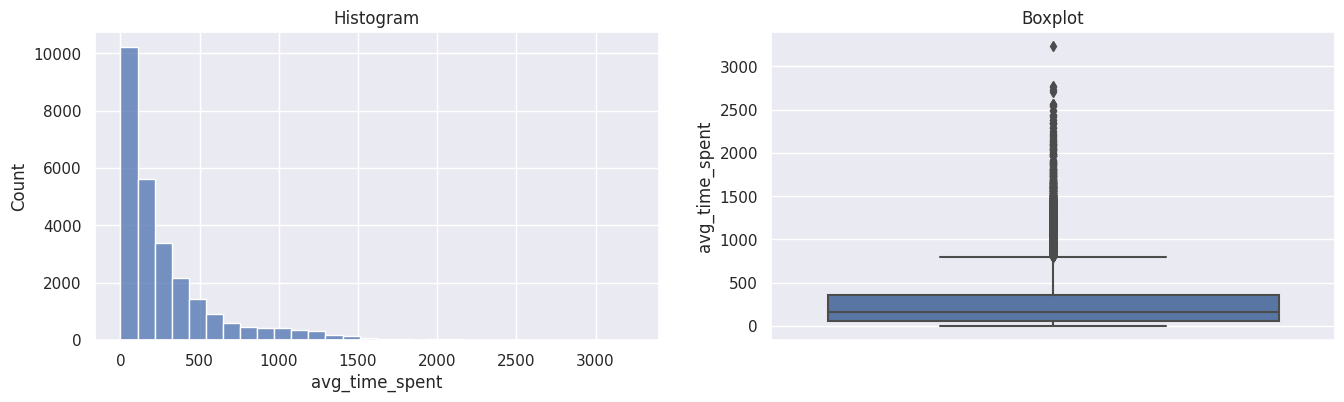


Skewness Value :  2.251765256794145


In [ ]:
#melihat distribusi data dan outlier kolom avg_time_spent
diagnostic_plots(X_train, 'avg_time_spent')
print('\nSkewness Value : ', X_train['avg_time_spent'].skew())

dari visualisasinya data cenderung kearah kiri dan bisa dikategorikan datanya terdistribusi sangat skew karena memiliki skewness value melebihi 0.6 dan memiliki outlier

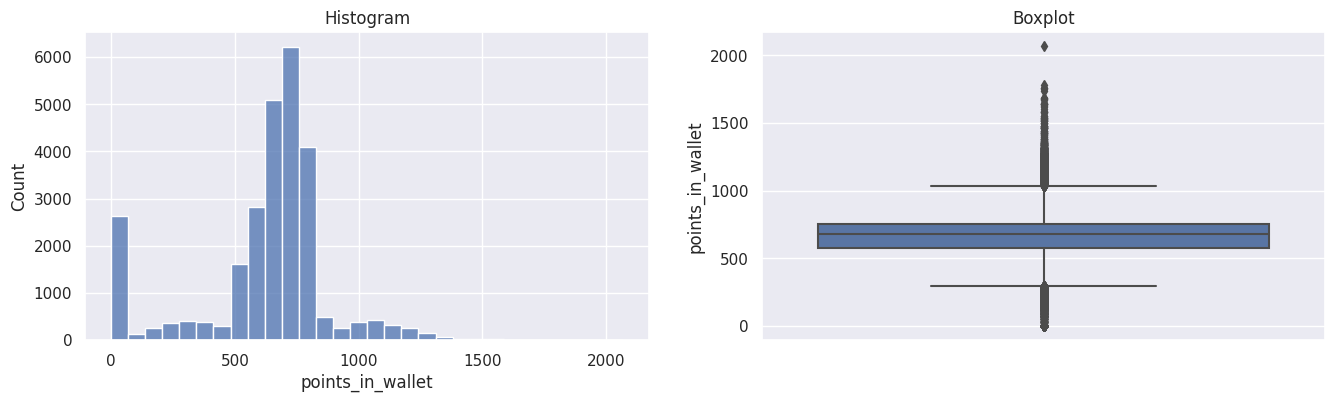


Skewness Value :  -0.779233530800518


In [ ]:
#melihat distribusi data dan outlier kolom points_in_wallet
diagnostic_plots(X_train, 'points_in_wallet')
print('\nSkewness Value : ', X_train['points_in_wallet'].skew())

dari visualisasinya terlihat datanya cenderung ditengah, bisa dikategorikan terdistribusi skew

### 5.2.1 - Outlier detection for Normally distributed variables

In [ ]:
#mendeteksi outlier
def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()

    return upper_boundary, lower_boundary

In [ ]:
#mendeteksi outlier dari kolom avg_frequency_login_days
upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'avg_frequency_login_days')
upper_boundary, lower_boundary

(42.994124810374075, -13.750491126357456)

In [ ]:
outlier = X_train[(X_train['avg_frequency_login_days'] <= lower_boundary) | (X_train['avg_frequency_login_days'] >= upper_boundary)]

print('percentage: ', len(outlier)/X_train.shape[0] * 100, '%')

percentage:  0.8044600763301654 %


setelah dideteksi, masih terdapat outlier, maka akan dihandling menggunakan gaussian untuk data yg terdistribusi normal

#### 5.2.1.1 - Handling Outlier using Gaussian method for Normal Distribution

In [ ]:
#menghandle outlier untuk data yg distribusi normal
def count_outliers_gaussian(X_train, col_name):
    col_mean, col_std = X_train[col_name].mean(), X_train[col_name].std()
  
    cut_off = col_std * 6
    lower, upper = col_mean - cut_off, col_mean + cut_off
    num_outliers = len(X_train[(X_train[col_name] < lower) | (X_train[col_name] > upper)])
    percentage_outliers = (num_outliers / len(X_train)) * 100
    
    return percentage_outliers

In [ ]:
#melihat presentase outlier yg sudah di handle
outlier_percentage = count_outliers_gaussian(X_train, 'avg_frequency_login_days')
print(f'Presentase outlier pada kolom avg_frequency_login_days adalah {outlier_percentage:.2f}%')

Presentase outlier pada kolom avg_frequency_login_days adalah 0.00%


setelah menggunakan metode gaussian, sudah tidak terdapat outlier

#### 5.2.2 - Outlier detection for skewed variables

In [ ]:
#mendeteksi outlier untuk distribusi skew
def find_skewed_boundaries(X_train, variable, distance):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    lower_boundary = X_train[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = X_train[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
#mendeteksi outlier dari kolom days_since_last_login
upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'days_since_last_login', 3)
upper_boundary, lower_boundary

(37.0, -12.0)

In [ ]:
outlier = X_train[(X_train['days_since_last_login'] <= lower_boundary) | (X_train['days_since_last_login'] >= upper_boundary)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

percentage:  0.0 %


In [ ]:
#mendeteksi outlier dari kolom avg_time_spent
upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'avg_time_spent', 3)
upper_boundary, lower_boundary

(1247.5425000000002, -830.2850000000002)

In [ ]:
outlier = X_train[(X_train['avg_time_spent'] <= lower_boundary) | (X_train['avg_time_spent'] >= upper_boundary)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

percentage:  1.727400519031142 %


In [ ]:
#mendeteksi outlier dari kolom avg_transaction_value
upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'avg_transaction_value', 3)
upper_boundary, lower_boundary

(120756.555, -65772.3225)

In [ ]:
outlier = X_train[(X_train['avg_transaction_value'] <= lower_boundary) | (X_train['avg_transaction_value'] >= upper_boundary)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

percentage:  0.0 %


In [ ]:
#mendeteksi outlier dari kolom points_in_wallet
upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'points_in_wallet', 3)
upper_boundary, lower_boundary

(1307.1974999999998, 22.64500000000021)

In [ ]:
outlier = X_train[(X_train['points_in_wallet'] <= lower_boundary) | (X_train['points_in_wallet'] >= upper_boundary)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

percentage:  7.34212802768166 %


kolom avg_time_spent dan points_in_wallet masih terdapat missing value, maka akan dihandle menggunakan winsorizer

#### 5.2.3 - Handling Outlier for skewed variables using winsorizing

Alasan menggunakan Winsorizing adalah untuk mempertahankan informasi yang terkandung dalam dataset dan mengurangi pengaruh outliers terhadap analisis atau model

In [ ]:
#groupping data
outlier_train = X_train[['avg_time_spent', 'points_in_wallet']]
outlier_train.head()

,avg_time_spent,points_in_wallet
35201,150.43,784.320000
8266,188.14,794.250000
9258,506.82,0.000000
2865,606.58,1211.818817
18924,86.82,0.000000


In [ ]:
#menggunakan winsorizer
for col in outlier_train:
    winsorisertrain = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['avg_time_spent', 'points_in_wallet'])

winsorisertrain.fit(outlier_train)
outlierdf_train = winsorisertrain.transform(outlier_train)

In [ ]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', winsorisertrain.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', winsorisertrain.right_tail_caps_)

Left Tail Caps  :  {'avg_time_spent': -385.0362500000001, 'points_in_wallet': 297.9062500000001}
Right Tail Caps :  {'avg_time_spent': 802.29375, 'points_in_wallet': 1031.9362499999997}


avg_time_spent - Before Capping


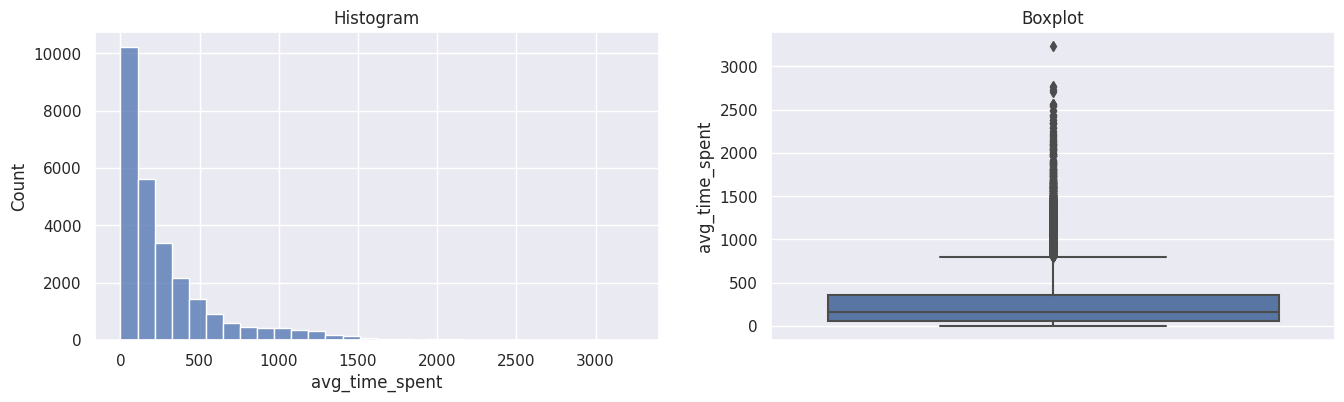


 avg_time_spent - After Capping


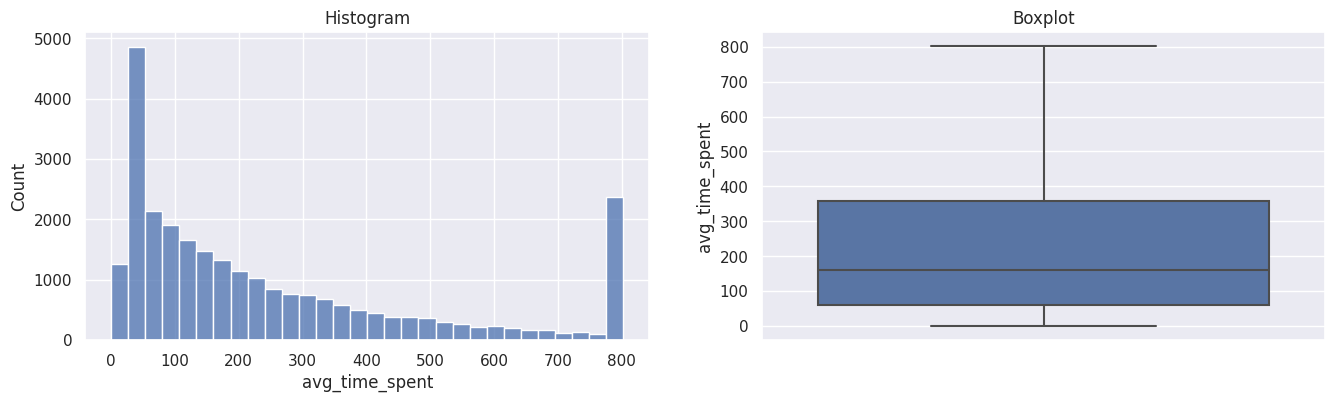

In [ ]:
#find outliers in avg_time_spent
print('avg_time_spent - Before Capping')
diagnostic_plots(outlier_train, 'avg_time_spent')
print('\n avg_time_spent - After Capping')
diagnostic_plots(outlierdf_train, 'avg_time_spent')

points_in_wallet - Before Capping


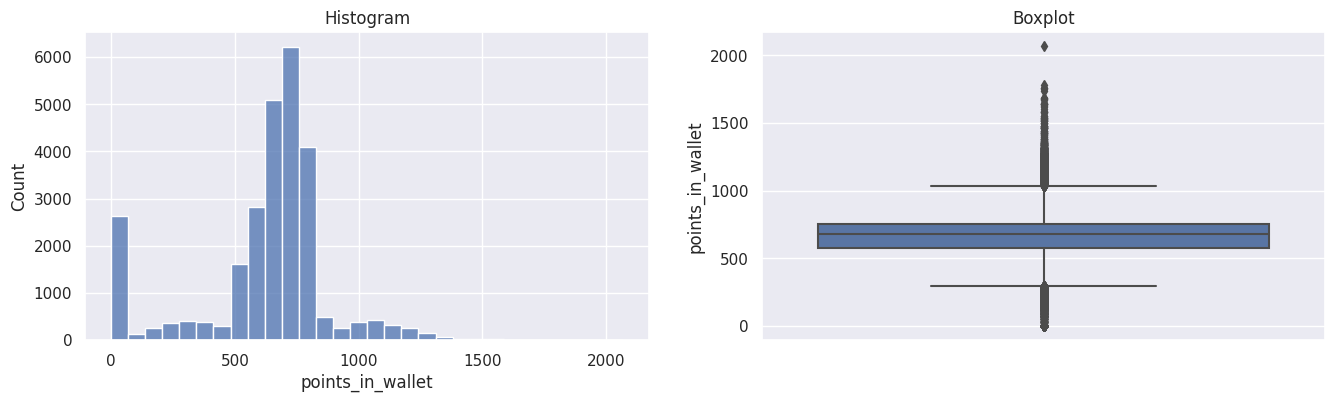


 points_in_wallet - After Capping


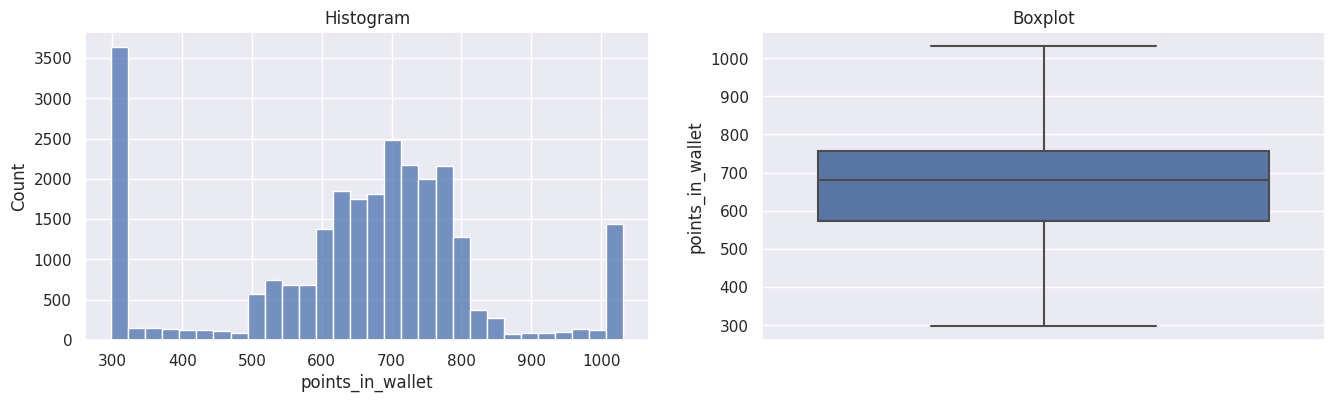

In [ ]:
#find outliers in points_in_wallet
print('points_in_wallet - Before Capping')
diagnostic_plots(outlier_train, 'points_in_wallet')
print('\n points_in_wallet - After Capping')
diagnostic_plots(outlierdf_train, 'points_in_wallet')

setelah menggunakan winsorizer kolom avg_time_spent dan points_in_wallet  sudah tidak memiliki outlier

## 5.3 - Handling Missing Value

In [ ]:
# Check Missing Values on X_train

X_train.isnull().sum()

age                                0
gender                            45
region_category                 3844
membership_category                0
joining_date                       0
joined_through_referral         3910
preferred_offer_types            207
medium_of_operation             3905
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [ ]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [ ]:
# Check Missing Values on X_val

X_val.isnull().sum()

age                               0
gender                            4
region_category                 753
membership_category               0
joining_date                      0
joined_through_referral         709
preferred_offer_types            38
medium_of_operation             684
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [ ]:
# Check Missing Values on y_val

y_val.isnull().sum()

0

In [ ]:
# Check Missing Values on X_test

X_test.isnull().sum()

age                               0
gender                           10
region_category                 831
membership_category               0
joining_date                      0
joined_through_referral         819
preferred_offer_types            43
medium_of_operation             804
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [ ]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

terdapat missing value di data X_train, X_val dan X_test, untun X_test akan di drop karena agar model tidak bias

In [ ]:
# drop missing value

X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]

mencoba mendeteksi apakah data tersebut missing value-nya MCAR atau tidak dengan menggunakan korelasi pearson

In [ ]:
# Hitung korelasi antara missing value dengan variabel lainnya
correlations = X_train.corrwith(X_train.isnull().astype(int), axis=0, method='pearson')
correlations

age                            NaN
days_since_last_login          NaN
avg_time_spent                 NaN
avg_transaction_value          NaN
avg_frequency_login_days       NaN
points_in_wallet               NaN
complaint_status               NaN
feedback                       NaN
gender                         NaN
internet_option                NaN
joined_through_referral        NaN
joining_date                   NaN
last_visit_time                NaN
medium_of_operation            NaN
membership_category            NaN
offer_application_preference   NaN
past_complaint                 NaN
preferred_offer_types          NaN
region_category                NaN
used_special_discount          NaN
dtype: float64

setelah di cek, ternyata tidak ada korelasi antara missing value dengan variabel yg lainnya. jadi, dapat dikategorikan bahwa missing value ditemukan secara acak (MCAR). maka akan mengisi nilai missing value menggunakan most_frequent simple imputer

In [ ]:
# mengisi nilai missing value menggunakan most_frequent
imputer = SimpleImputer(strategy='most_frequent')
X_train[['gender', 'region_category', 'joined_through_referral',
         'preferred_offer_types', 'medium_of_operation']] = imputer.fit_transform(X_train[['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']])


X_val[['gender', 'region_category', 'joined_through_referral',
         'preferred_offer_types', 'medium_of_operation']] = imputer.fit_transform(X_val[['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']])

In [ ]:
# Check Missing Values on X_train

X_train.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

In [ ]:
# Check Missing Values on X_val

X_val.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

sudah tidak ada missing value di kolom X_train dan X_val

## 5.4 - Feature Selection

In [ ]:
#duplikasi data X_train
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [ ]:
# Identifikasi kolom datetime
datetime_cols = X_train_copy.select_dtypes(include=['datetime64']).columns
datetime_cols

Index(['joining_date', 'last_visit_time'], dtype='object')

In [ ]:
# konversi tipe data
X_train_copy[datetime_cols] = X_train_copy[datetime_cols].astype(int)

In [ ]:
# grouping data nominal
nominal_columns = ['gender', 'region_category', 'membership_category',
                   'joined_through_referral', 'preferred_offer_types', 'medium_of_operation',
                   'internet_option', 'used_special_discount', 'offer_application_preference',
                   'past_complaint', 'complaint_status', 'feedback']

In [ ]:
# encoding data nominal untuk seleksi fitur
gender = ['F', 'M']
region_category = ['Town', 'City', 'Village']
membership_category = ['Silver Membership', 'Gold Membership', 'Basic Membership','No Membership', 'Premium Membership', 'Platinum Membership']
joined_through_referral = ['Yes', 'No']
preferred_offer_types = ['Without Offers', 'Credit/Debit Card Offers','Gift Vouchers/Coupons']
medium_of_operation = ['Desktop', 'Smartphone', 'Both']
internet_option = ['Wi-Fi', 'Mobile_Data', 'Fiber_Optic']
used_special_discount = ['No', 'Yes']
offer_application_preference = ['Yes', 'No']
past_complaint = ['No', 'Yes']
complaint_status = ['Not Applicable', 'No Information Available', 'Unsolved','Solved in Follow-up', 'Solved']
feedback = ['Poor Product Quality', 'Too many ads', 'Poor Customer Service','Poor Website', 'No reason specified', 'Reasonable Price','User Friendly Website', 'Products always in Stock','Quality Customer Care']

categories = [gender, region_category, membership_category, joined_through_referral, preferred_offer_types, medium_of_operation, internet_option, used_special_discount, offer_application_preference, past_complaint, complaint_status, feedback]

ord_enc = OrdinalEncoder(categories=categories)

X_train_copy[nominal_columns] = ord_enc.fit_transform(X_train_copy[nominal_columns])


In [ ]:
# inisialisasi objek SelectKBest dengan chi-square test
selector = SelectKBest(chi2)
selector.fit(X_train_copy, y_train_copy)

SelectKBest(score_func=<function chi2 at 0x7f231dd30b80>)

In [ ]:
# simpan nilai chi-square
features_scores = pd.DataFrame({'features': X_train_copy.columns, 'chi2_score': selector.scores_, 'p_value': selector.pvalues_})
features_scores = features_scores.sort_values('chi2_score', ascending=False)
features_scores

,features,chi2_score,p_value
4,joining_date,1.385769e+15,0.000000e+00
9,last_visit_time,3.806868e+08,0.000000e+00
12,avg_transaction_value,1.606667e+07,0.000000e+00
14,points_in_wallet,1.324807e+05,0.000000e+00
19,feedback,5.507207e+03,0.000000e+00
13,avg_frequency_login_days,2.133789e+03,0.000000e+00
3,membership_category,1.223023e+03,6.050263e-268
11,avg_time_spent,1.035419e+03,3.594049e-227
6,preferred_offer_types,3.408478e+01,5.276233e-09
10,days_since_last_login,1.684596e+01,4.053961e-05


Dari hasil perhitungan chi2 score, terlihat bahwa fitur-fitur yang paling berpengaruh dalam menentukan churn customer adalah joining_date, last_visit_time
, avg_transaction_value, points_in_wallet, feedback, avg_frequency_login_days. maka fitur tersebut akan digunakan dalam permodelan

In [ ]:
# Drop Columns

X_train.drop(['age', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'avg_time_spent',
              'days_since_last_login', 'offer_application_preference', 'used_special_discount', 'complaint_status', 'internet_option', 'past_complaint',
              'gender', 'medium_of_operation'], axis=1, inplace=True)
X_val.drop(['age', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'avg_time_spent',
              'days_since_last_login', 'offer_application_preference', 'used_special_discount', 'complaint_status', 'internet_option', 'past_complaint',
              'gender', 'medium_of_operation'], axis=1, inplace=True)
X_test.drop(['age', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'avg_time_spent',
              'days_since_last_login', 'offer_application_preference', 'used_special_discount', 'complaint_status', 'internet_option', 'past_complaint',
              'gender', 'medium_of_operation'], axis=1, inplace=True)
X_train

,joining_date,last_visit_time,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback
35201,2017-03-03,2023-03-30 15:23:21,6218.72,5.0,784.320000,Poor Product Quality
8266,2016-10-05,2023-03-30 18:24:41,35912.36,21.0,794.250000,Too many ads
9258,2016-05-03,2023-03-30 19:05:02,39798.06,19.0,0.000000,Too many ads
2865,2016-07-19,2023-03-30 01:19:36,21662.57,14.0,1211.818817,Too many ads
18924,2016-12-26,2023-03-30 13:07:01,3672.22,0.0,0.000000,Too many ads
...,...,...,...,...,...,...
33475,2015-09-24,2023-03-30 08:12:08,15995.38,12.0,615.600000,Poor Website
12816,2016-03-28,2023-03-30 23:44:13,24905.03,19.0,690.310000,No reason specified
30429,2017-04-02,2023-03-30 06:55:22,35096.12,13.0,1005.908009,Poor Website
13763,2015-04-07,2023-03-30 06:48:48,884.15,16.0,1214.633172,Poor Product Quality


## 5.5 - Get Numerical Columns and Categorical Columns

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['feedback']


## 5.6 - Using Pipeline

In [ ]:
# Create A Pipeline

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [ ]:
# Fit and Transform data
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

In [ ]:
X_train.shape

(26726, 12)

# 6 - Model Definition

1. Alasan menggunakan Sequential API adalah karena mudah digunakan untuk membuat model neural network yg sederhana dan linear, terdiri dari layer yg dihubungkan secara berurutan

2. Alasan menggunakan Functional API adalah dapat membuat model neural network yg lebih kompleks

3. Activation yg digunakan relu karena efisien dalam komputasi dan direkomendasikan menggunakan relu untuk model regressi

4. Loss yg digunakan adalah mean squard error untuk menghitung perbedaan antara nilai prediksi dengan nilai train

4. Metriks yg digunakan adalah mean absolute error untuk mengukur besarnya kesalahan antara nilai prediksi dengan nilai train

5. Optimizer yg digunakan adalah adam karena adam menggabungkan kecepatan dan akurasi

# 7 - Model Training

## 7.1 - Sequential API

In [ ]:
# Create Sequential API
model_sequential = Sequential()
model_sequential.add(Dense(20, activation='relu', input_shape=(12,)))
model_sequential.add(Dense(10, activation='relu'))
model_sequential.add(Dense(1, activation='relu'))

# Compile
model_sequential.compile(loss='mean_squared_error',
                         optimizer='adam',
                         metrics=['mean_absolute_error'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

%%time
history_seq = model_sequential.fit(X_train, 
                                   y_train,
                                   epochs=30,
                                   validation_data=(X_val, y_val),
                                   batch_size=15)

Epoch 1/30
1782/1782 [==============================] - 5s 2ms/step - loss: 0.1842 - mean_absolute_error: 0.3638 - val_loss: 0.1383 - val_mean_absolute_error: 0.3004
Epoch 2/30
1782/1782 [==============================] - 4s 2ms/step - loss: 0.1120 - mean_absolute_error: 0.2371 - val_loss: 0.1024 - val_mean_absolute_error: 0.2198
Epoch 3/30
1782/1782 [==============================] - 4s 2ms/step - loss: 0.0953 - mean_absolute_error: 0.1968 - val_loss: 0.0945 - val_mean_absolute_error: 0.2003
Epoch 4/30
1782/1782 [==============================] - 4s 2ms/step - loss: 0.0919 - mean_absolute_error: 0.1859 - val_loss: 0.0923 - val_mean_absolute_error: 0.1911
Epoch 5/30
1782/1782 [==============================] - 4s 2ms/step - loss: 0.0910 - mean_absolute_error: 0.1820 - val_loss: 0.0944 - val_mean_absolute_error: 0.1711
Epoch 6/30
1782/1782 [==============================] - 4s 2ms/step - loss: 0.0906 - mean_absolute_error: 0.1805 - val_loss: 0.0970 - val_mean_absolute_error: 0.1661
Epoc

## 7.2 - Functional API

In [ ]:
# Create Functional Model
input_layer = Input(shape=(12,))
hidden_layer_1 = Dense(20, activation='relu')(input_layer)
hidden_layer_2 = Dense(10, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='mean_squared_error',
                         optimizer='adam',
                         metrics='mean_absolute_error')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 20)           260         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 10)           210         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 22)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

In [ ]:
# Train the Model

%%time
history_func = model_sequential.fit(X_train, 
                                   y_train,
                                   epochs=30,
                                   validation_data=(X_val, y_val),
                                   batch_size=15)

Epoch 1/30
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0853 - mean_absolute_error: 0.1689 - val_loss: 0.0860 - val_mean_absolute_error: 0.1703
Epoch 2/30
1782/1782 [==============================] - 4s 2ms/step - loss: 0.0850 - mean_absolute_error: 0.1681 - val_loss: 0.0884 - val_mean_absolute_error: 0.1561
Epoch 3/30
1782/1782 [==============================] - 3s 2ms/step - loss: 0.0850 - mean_absolute_error: 0.1682 - val_loss: 0.0865 - val_mean_absolute_error: 0.1748
Epoch 4/30
1782/1782 [==============================] - 3s 2ms/step - loss: 0.0848 - mean_absolute_error: 0.1675 - val_loss: 0.0862 - val_mean_absolute_error: 0.1719
Epoch 5/30
1782/1782 [==============================] - 4s 2ms/step - loss: 0.0848 - mean_absolute_error: 0.1680 - val_loss: 0.0857 - val_mean_absolute_error: 0.1628
Epoch 6/30
1782/1782 [==============================] - 4s 2ms/step - loss: 0.0847 - mean_absolute_error: 0.1677 - val_loss: 0.0880 - val_mean_absolute_error: 0.1594
Epoc

# 8 - Model Evaluation

## 8.1 - Sequential API

In [ ]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.184243,0.363802,0.138251,0.300387
1,0.111999,0.237128,0.102429,0.219801
2,0.095306,0.196842,0.094531,0.200335
3,0.091925,0.185949,0.092330,0.191123
4,0.091039,0.182050,0.094384,0.171112
5,0.090621,0.180478,0.096981,0.166080
6,0.089505,0.178225,0.091745,0.170099
7,0.089059,0.177194,0.094141,0.168741
8,0.088806,0.176553,0.090997,0.170384
9,0.088285,0.175771,0.090845,0.174662


<Axes: >

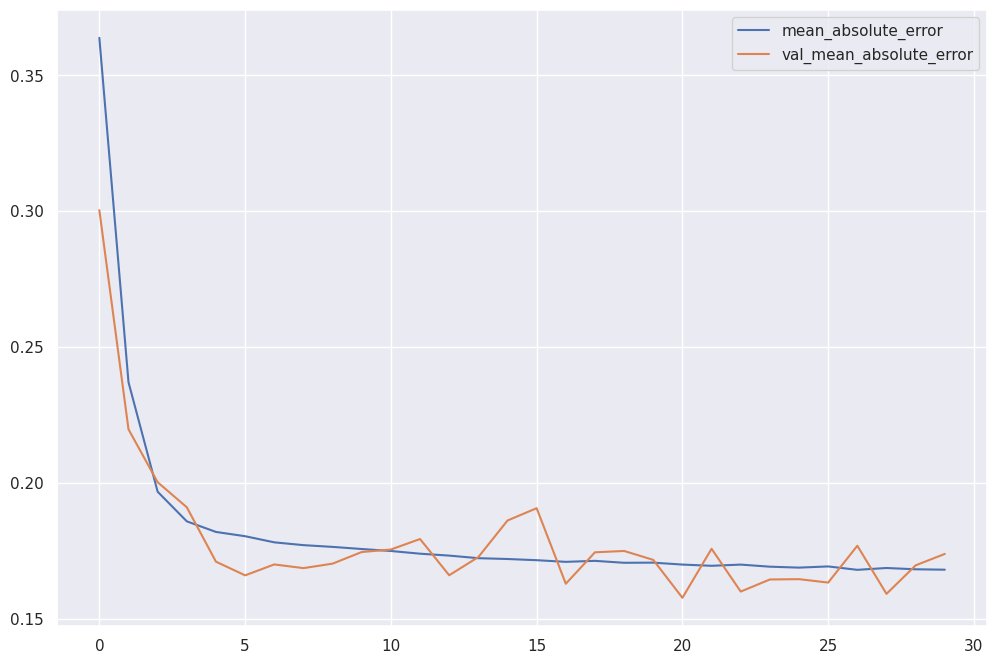

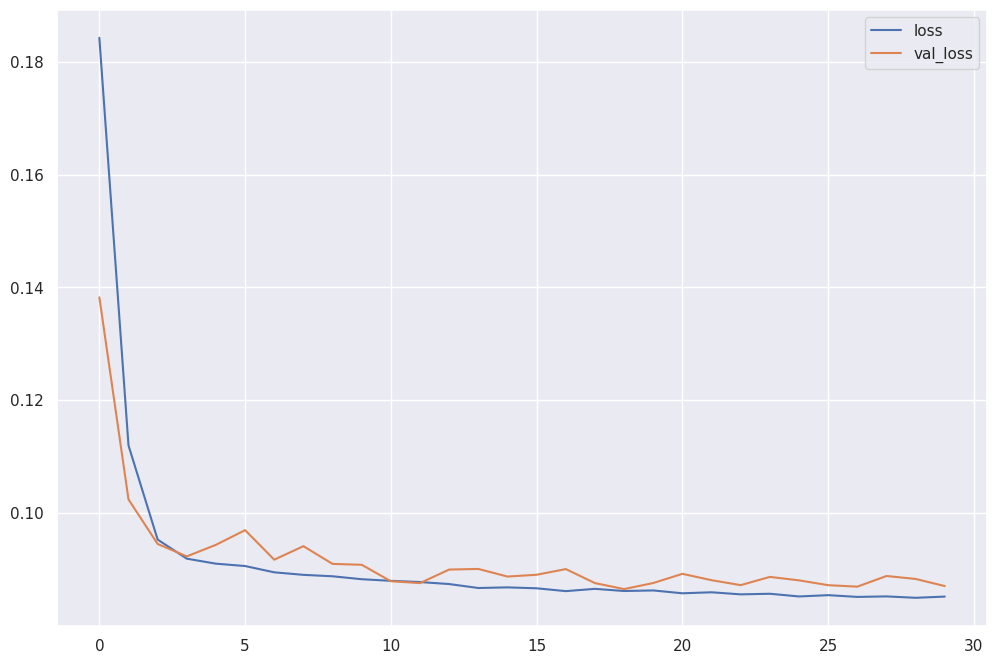

In [ ]:
# Plot Training Results

history_seq_df[['mean_absolute_error', 'val_mean_absolute_error']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation of test-set
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

107/107 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1612
           1       0.84      0.93      0.88      1812

    accuracy                           0.87      3424
   macro avg       0.88      0.87      0.87      3424
weighted avg       0.87      0.87      0.87      3424



Model sequential API menggunakan 2 layer Dense, dengan 20 neuron pada layer pertama dan 10 neuron pada layer kedua dan dengan 1 neuron pada output layer hasilnya, model memiliki akurasi sebesar 0.87 dengan precision dan recall yang baik untuk kelas 0 dan 1, serta f1-score yang cukup tinggi.

## 8.2 - Functional API

In [ ]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.085307,0.168922,0.085959,0.170343
1,0.085001,0.168103,0.088402,0.156148
2,0.084986,0.168200,0.086468,0.174755
3,0.084818,0.167497,0.086210,0.171912
4,0.084795,0.167979,0.085702,0.162763
5,0.084750,0.167734,0.088002,0.159359
6,0.084727,0.167189,0.086742,0.173967
7,0.084565,0.167249,0.088629,0.171628
8,0.084564,0.167325,0.086733,0.173789
9,0.084549,0.167239,0.086339,0.169501


<Axes: >

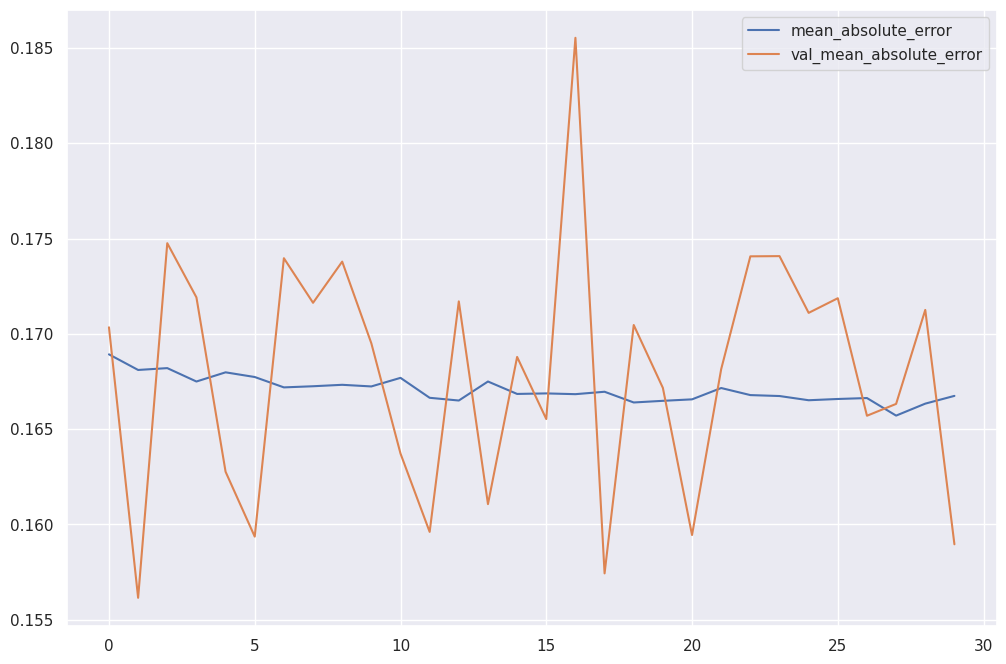

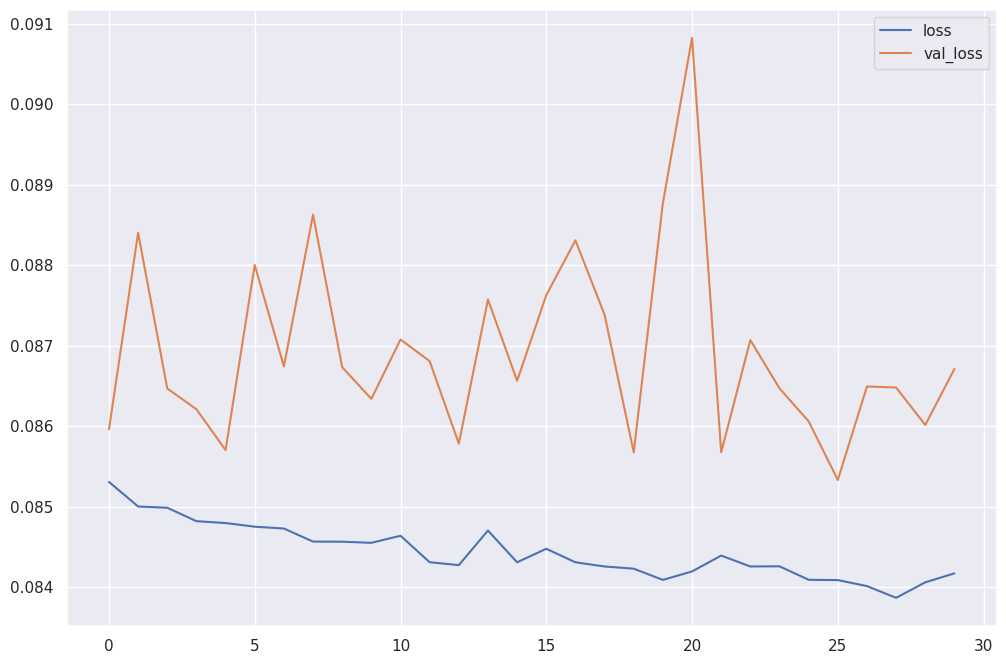

In [ ]:
# Plot Training Results

history_func_df[['mean_absolute_error', 'val_mean_absolute_error']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation of test-set
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

107/107 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.53      0.52      0.53      1612
           1       0.58      0.59      0.59      1812

    accuracy                           0.56      3424
   macro avg       0.56      0.56      0.56      3424
weighted avg       0.56      0.56      0.56      3424



Model Function API menggunakan 2 hidden layer dengan 20 neuron pada layer pertama dan 10 neuron pada layer kedua dan  juga 1 output layer dengan 1 neuron, model function memiliki akurasi yg rendah (46%) dan f1-score juga rendah (0.40). Model Sequential API memiliki akurasi yang lebih tinggi (87%) dan f1-score lebih baik (0.87)

# 9 - Model Improvement

## 9.1 - Sequential API

In [ ]:
# Create Sequential API
model_sequential = Sequential()
model_sequential.add(Dense(64, activation='relu', input_shape=(12,)))
model_sequential.add(Dense(32, activation='relu'))
model_sequential.add(Dropout(0.2))
model_sequential.add(Dense(16, activation='relu'))
model_sequential.add(Dropout(0.2))
model_sequential.add(Dense(1, activation='relu'))

# Compile
model_sequential.compile(loss='mean_squared_error',
                         optimizer='adamax',
                         metrics=['mean_absolute_error'])

model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-traina

In [ ]:
# Train the Model
history_seq_imp = model_sequential.fit(X_train, 
                                   y_train,
                                   epochs=50,
                                   validation_data=(X_val, y_val),
                                   batch_size=64)

Epoch 1/50
418/418 [==============================] - 3s 4ms/step - loss: 0.2581 - mean_absolute_error: 0.4375 - val_loss: 0.1895 - val_mean_absolute_error: 0.3908
Epoch 2/50
418/418 [==============================] - 1s 2ms/step - loss: 0.1916 - mean_absolute_error: 0.3718 - val_loss: 0.1599 - val_mean_absolute_error: 0.3434
Epoch 3/50
418/418 [==============================] - 1s 2ms/step - loss: 0.1636 - mean_absolute_error: 0.3340 - val_loss: 0.1400 - val_mean_absolute_error: 0.3071
Epoch 4/50
418/418 [==============================] - 1s 2ms/step - loss: 0.1456 - mean_absolute_error: 0.3063 - val_loss: 0.1209 - val_mean_absolute_error: 0.2633
Epoch 5/50
418/418 [==============================] - 1s 2ms/step - loss: 0.1313 - mean_absolute_error: 0.2821 - val_loss: 0.1093 - val_mean_absolute_error: 0.2467
Epoch 6/50
418/418 [==============================] - 1s 2ms/step - loss: 0.1217 - mean_absolute_error: 0.2628 - val_loss: 0.1030 - val_mean_absolute_error: 0.2347
Epoch 7/50
418/4

In [ ]:
# Create DataFrame

history_seq_improve = pd.DataFrame(history_seq_imp.history)
history_seq_improve

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.258107,0.437476,0.189453,0.390850
1,0.191640,0.371818,0.159911,0.343388
2,0.163647,0.334021,0.140023,0.307112
3,0.145559,0.306334,0.120887,0.263275
4,0.131272,0.282148,0.109306,0.246731
5,0.121737,0.262806,0.103043,0.234692
6,0.115636,0.250142,0.098957,0.224226
7,0.110645,0.238914,0.096879,0.217295
8,0.108096,0.232670,0.096028,0.210175
9,0.106351,0.227123,0.094514,0.205413


<Axes: >

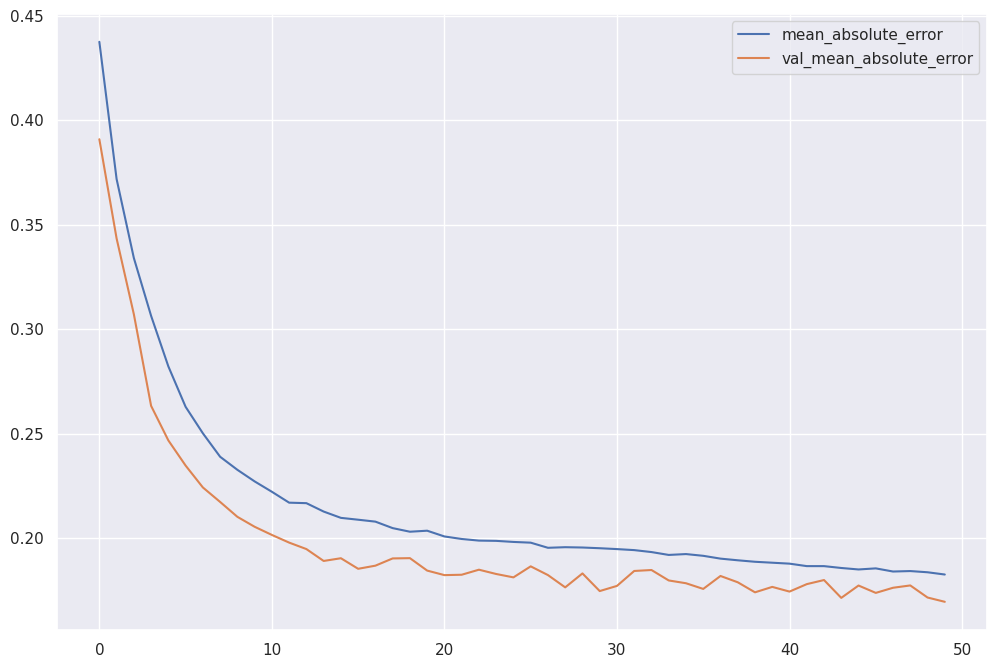

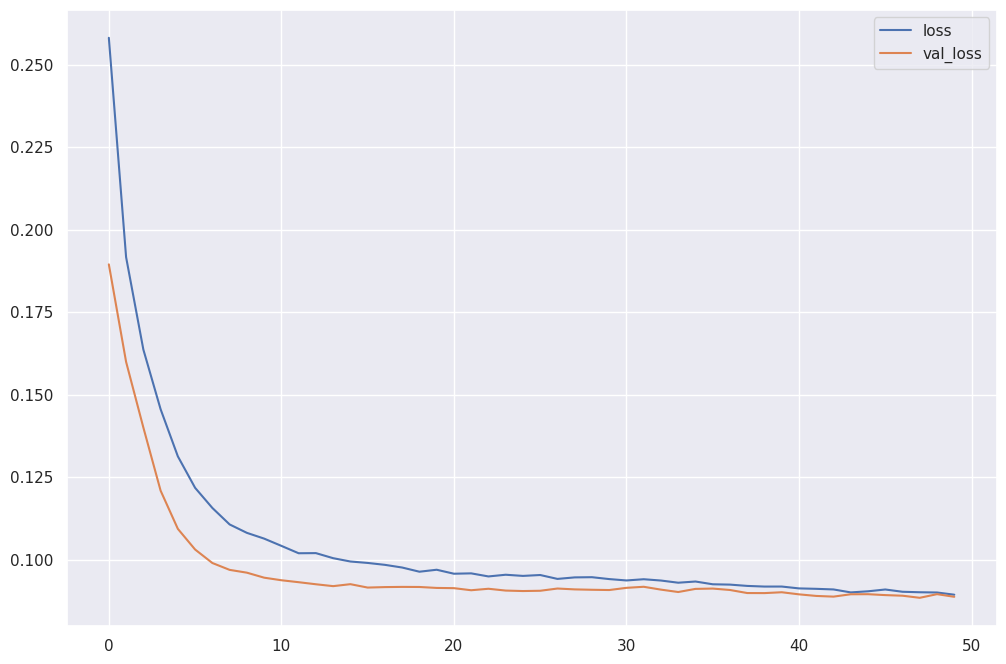

In [ ]:
# Plot Training Results

history_seq_improve[['mean_absolute_error', 'val_mean_absolute_error']].plot()
history_seq_improve[['loss', 'val_loss']].plot()

In [ ]:
# Evaluate Model
y_pred_seq_imp = model_sequential.predict(X_test)
y_pred_seq_imp = np.where(y_pred_seq_imp >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_imp))

107/107 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1612
           1       0.82      0.95      0.88      1812

    accuracy                           0.86      3424
   macro avg       0.88      0.86      0.86      3424
weighted avg       0.87      0.86      0.86      3424



Sebelum Improvement

107/107 [==============================] - 0s 889us/step

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1612
           1       0.85      0.91      0.88      1812

    accuracy                           0.87      3424

   macro avg       0.87      0.87      0.87      3424

weighted avg       0.87      0.87      0.87      3424


setelah melakukan model improvment, dengan menambahkan 3 hidden layer diantaranya layer pertama menggunakan 64 neuron, layer ke 2 menggunakan 32 layer, dan layer ke 3 menggunakan 16, dan juga menambahkan 2 yg digunakan untuk mengurangi overfitting, terdapat peningkatan performa model Sequential API

## 9.2 - Functional API

In [ ]:
# Create Functional Model with 2 Hidden Layers
input_layer = Input(shape=(12,))
hidden_layer_1 = Dense(50, activation='relu')(input_layer)
hidden_layer_2 = Dense(20, activation='relu')(hidden_layer_1)
output_layer = Dense(1, activation='relu')(hidden_layer_2)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='mean_squared_error',
                         optimizer=Adam(learning_rate=0.001),
                         metrics=['mean_absolute_error'])
model_functional.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_10 (Dense)            (None, 50)                650       
                                                                 
 dense_11 (Dense)            (None, 20)                1020      
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model
history_func_imp = model_functional.fit(X_train, 
                                    y_train,
                                    epochs=50,
                                    validation_data=(X_val, y_val),
                                    batch_size=32)

Epoch 1/50
836/836 [==============================] - 2s 2ms/step - loss: 0.1746 - mean_absolute_error: 0.3462 - val_loss: 0.1271 - val_mean_absolute_error: 0.2698
Epoch 2/50
836/836 [==============================] - 2s 2ms/step - loss: 0.1101 - mean_absolute_error: 0.2350 - val_loss: 0.1016 - val_mean_absolute_error: 0.2062
Epoch 3/50
836/836 [==============================] - 2s 2ms/step - loss: 0.0986 - mean_absolute_error: 0.2030 - val_loss: 0.0954 - val_mean_absolute_error: 0.1992
Epoch 4/50
836/836 [==============================] - 2s 2ms/step - loss: 0.0950 - mean_absolute_error: 0.1927 - val_loss: 0.0964 - val_mean_absolute_error: 0.2116
Epoch 5/50
836/836 [==============================] - 2s 2ms/step - loss: 0.0921 - mean_absolute_error: 0.1865 - val_loss: 0.0916 - val_mean_absolute_error: 0.1870
Epoch 6/50
836/836 [==============================] - 3s 3ms/step - loss: 0.0910 - mean_absolute_error: 0.1831 - val_loss: 0.0938 - val_mean_absolute_error: 0.1744
Epoch 7/50
836/8

In [ ]:
# Create DataFrame

history_func_improve = pd.DataFrame(history_func_imp.history)
history_func_improve

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.174607,0.346171,0.127092,0.269775
1,0.110126,0.235044,0.101621,0.206211
2,0.098576,0.203020,0.095382,0.199225
3,0.095031,0.192712,0.096359,0.211557
4,0.092089,0.186495,0.091644,0.187014
5,0.090984,0.183143,0.093798,0.174375
6,0.090087,0.180555,0.093805,0.197152
7,0.089608,0.179239,0.092323,0.168459
8,0.089435,0.177293,0.089929,0.176414
9,0.088729,0.176716,0.090390,0.180033


<Axes: >

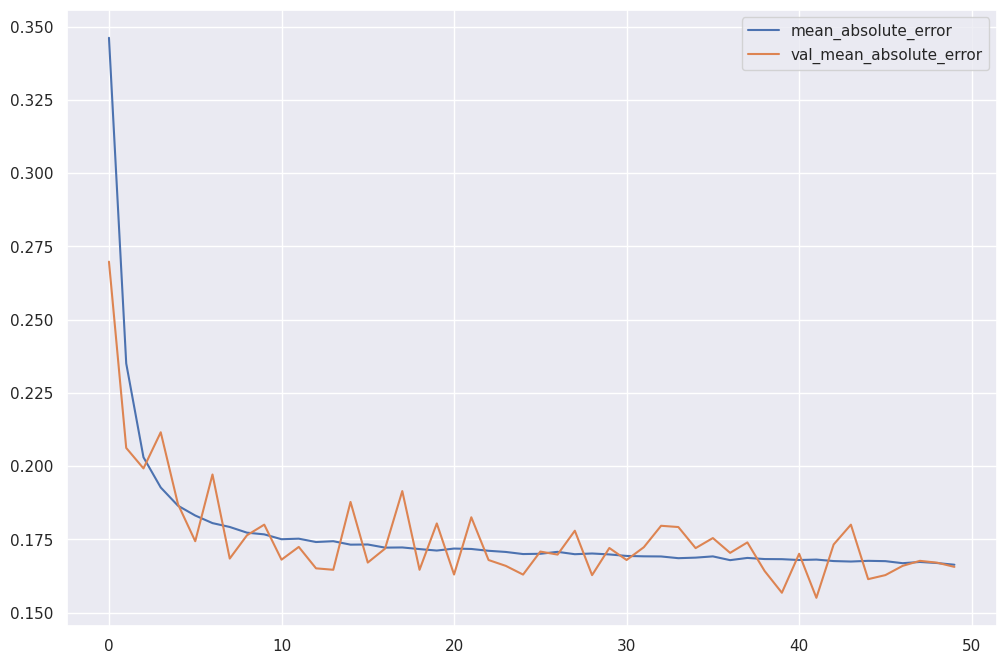

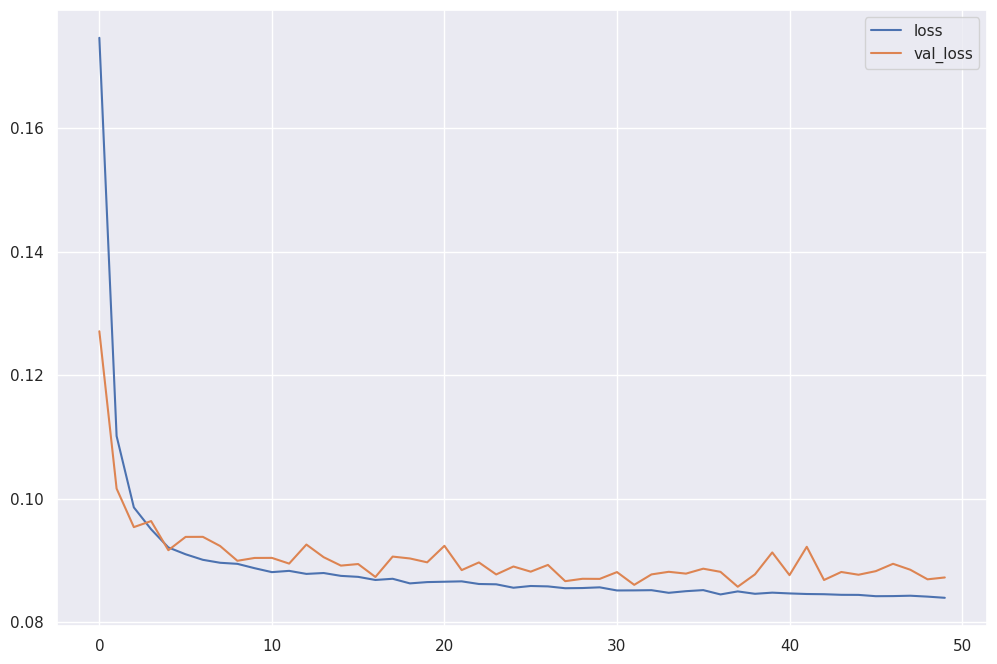

In [ ]:
# Plot Training Results

history_func_improve[['mean_absolute_error', 'val_mean_absolute_error']].plot()
history_func_improve[['loss', 'val_loss']].plot()

In [ ]:
# Model Evaluation of test-set
y_pred_func_imp = model_functional.predict(X_test)
y_pred_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_imp))

107/107 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1612
           1       0.83      0.93      0.88      1812

    accuracy                           0.86      3424
   macro avg       0.87      0.86      0.86      3424
weighted avg       0.87      0.86      0.86      3424



Sebelum Improvement

107/107 [==============================] - 0s 907us/step

              precision    recall  f1-score   support

           0       0.32      0.14      0.20      1612
           1       0.49      0.73      0.59      1812

    accuracy                           0.46      3424
   macro avg       0.41      0.44      0.39      3424
weighted avg       0.41      0.46      0.40      3424

setelah melakukan model improvment dengan menambahkan jumlah neuron 50 untuk layer pertama dan 20 untuk layer ke 2 dan juga menggunakan optimizer Adam dengan learning rate sebesar 0.001. terdapat peningkatan performa model Functional API, Namun, model Functional API memiliki performa yang sedikit lebih tinggi dibandingkan dengan model Sequential API. maka, akan menggunakan model Squential API untuk inference

# 10 - Model Saving

In [ ]:
# Save Pipeline


with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

with open('list_num_cols.txt', 'w') as file_2:
  json.dump(num_columns, file_2)

with open('list_cat_cols.txt', 'w') as file_3:
  json.dump(cat_columns, file_3)

with open('model_sequential.pkl', 'wb') as file_4:
  pickle.dump(model_sequential, file_4)

In [ ]:
# Summary of Model Sequential

model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-traina

In [ ]:
# Freeze Model

model_sequential.trainable = False
model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 0
Non-trainable 

In [ ]:
# Save ANN Model

model_sequential.save('churn_model.h5')